In [1]:
# SETUP
## Importing libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Random params
np.random.seed(0)
random_state = 338

## Plot params
%matplotlib inline
np.random.seed(0)
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

## Load train and test
test = pd.read_csv('../test.csv', index_col='id')
dT = pd.read_csv('../train.csv', index_col='id')

## Calc stats
# stats = dT.describe()
# statsTarget = stats.pop('claim')
# stats = stats.transpose()
old = dT.copy()

In [2]:
# 251s
from sklearn.preprocessing import QuantileTransformer as mms
mmslr = mms()
mmslr.fit(dT)
scaled = pd.DataFrame(mmslr.transform(dT))
scaled.index = dT.index
scaled.columns = dT.columns
scaled['na'] = scaled.isna().sum(axis=1)
scaled.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f111,f112,f113,f114,f115,f116,f117,f118,claim,na
id,,,,,,,,,,,,,,,,,,,,,
0,0.709209,0.065454,0.073145,0.181102,0.380992,0.000882,0.127921,0.356330,0.477030,0.261447,...,0.587969,0.516212,0.163625,0.294729,0.656657,0.286348,0.050137,0.875106,1.0,1
1,0.647247,0.277394,0.882121,0.725282,0.865407,0.356769,0.553341,0.293632,0.802745,0.835464,...,0.987952,0.358262,0.651466,0.167415,0.759259,0.431366,0.323639,0.257717,0.0,0
2,0.989223,0.017655,0.422830,0.719801,0.864948,0.592002,0.712674,0.577693,0.252042,0.898441,...,0.048633,0.348938,0.789281,0.634226,0.495495,0.270381,0.569770,0.414877,1.0,5
3,0.919299,0.076458,0.388617,0.213634,0.996122,0.995305,0.113370,0.464806,0.337341,0.120580,...,0.696234,0.407085,0.024170,0.308447,0.510511,0.141581,0.656913,0.552234,1.0,2
4,0.747227,0.974520,0.053713,0.750358,0.554429,0.494156,0.760165,0.202156,0.641947,0.310054,...,0.308475,0.444489,0.433667,0.282368,0.958809,0.134276,NaN,0.201129,1.0,8


In [3]:
# 113s
mmslr2 = mms()
mmslr2.fit(test)
scaledTeste = pd.DataFrame(mmslr2.transform(test))
scaledTeste.index = test.index
scaledTeste.columns = test.columns
X_teste = scaledTeste.copy()
X_teste['na'] = test.isna().sum(axis=1)
X_teste.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,na
id,,,,,,,,,,,,,,,,,,,,,
957919,0.961791,0.875447,0.502672,0.204066,0.470228,0.745415,0.279620,0.023387,0.165708,0.763245,...,0.343726,0.696344,0.364906,0.083760,0.737000,0.596597,0.237384,0.344204,0.487068,1
957920,0.829955,0.450688,0.575169,0.968432,0.513484,0.196543,0.361916,0.747609,0.517649,0.477175,...,0.906462,0.373373,0.202486,0.871011,0.753826,0.280781,0.711417,0.788581,0.253336,0
957921,0.771146,0.698779,0.375668,0.284343,0.399769,0.615675,0.783189,0.532974,0.480955,0.299038,...,0.205383,0.706621,0.123510,0.297768,0.604091,0.314314,0.226515,0.724666,0.113298,1
957922,0.154780,0.522376,0.444641,0.984883,0.615198,0.538388,0.216706,0.542603,0.012639,0.131633,...,0.862490,0.293293,0.316564,0.523020,0.554668,0.267267,0.942776,0.751004,0.308970,0
957923,0.365343,0.019079,0.873630,0.802310,0.846537,0.073772,0.848521,0.646834,0.142222,0.757087,...,0.410591,0.905470,0.400820,0.232547,0.652939,0.763764,0.943866,0.376358,0.320705,0


In [4]:
# scaled.isna().sum()
dT['hmm'] = dT.loc[:,['f97','f96','f95','f87','f8','f79','f73','f71','f68','f63','f62']].sum(axis=1)
test['hmm'] = test.loc[:,['f97','f96','f95','f87','f8','f79','f73','f71','f68','f63','f62']].sum(axis=1)

In [5]:
# scaled['na'] = dT.isna().sum(axis=1)
X = scaled.drop('claim',axis=1).copy()
y = old['claim']
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,na
id,,,,,,,,,,,,,,,,,,,,,
0,0.709209,0.065454,0.073145,0.181102,0.380992,0.000882,0.127921,0.356330,0.477030,0.261447,...,0.558340,0.587969,0.516212,0.163625,0.294729,0.656657,0.286348,0.050137,0.875106,1
1,0.647247,0.277394,0.882121,0.725282,0.865407,0.356769,0.553341,0.293632,0.802745,0.835464,...,0.055948,0.987952,0.358262,0.651466,0.167415,0.759259,0.431366,0.323639,0.257717,0
2,0.989223,0.017655,0.422830,0.719801,0.864948,0.592002,0.712674,0.577693,0.252042,0.898441,...,0.735123,0.048633,0.348938,0.789281,0.634226,0.495495,0.270381,0.569770,0.414877,5
3,0.919299,0.076458,0.388617,0.213634,0.996122,0.995305,0.113370,0.464806,0.337341,0.120580,...,0.188625,0.696234,0.407085,0.024170,0.308447,0.510511,0.141581,0.656913,0.552234,2
4,0.747227,0.974520,0.053713,0.750358,0.554429,0.494156,0.760165,0.202156,0.641947,0.310054,...,0.523035,0.308475,0.444489,0.433667,0.282368,0.958809,0.134276,NaN,0.201129,8


In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

skf = StratifiedKFold(n_splits=5, random_state=random_state, shuffle=True)
skf.get_n_splits(X, y)

for fold, (train_indicies, valid_indicies) in enumerate(skf.split(X=X,y=y)):
    X_train = X.loc[train_indicies].copy()
    X_valid = X.loc[valid_indicies].copy()

    y_train = y.loc[train_indicies].copy()
    y_valid = y.loc[valid_indicies].copy()
    X_train = X_train.fillna(0)
    X_valid = X_valid.fillna(0)
    clf = GaussianNB()
    clf.fit(X_train,y_train)
    
    print('Fold: ',fold)
    print(roc_auc_score(y_valid, clf.predict_proba(X_valid)[:,1]))

Fold:  0
0.7857339572056073
Fold:  1
0.7842298934208414
Fold:  2
0.7845815575065476
Fold:  3
0.7839606435726285
Fold:  4
0.7856110685974589


In [8]:
# dummy = pd.DataFrame()
# dummy['na'] = X.isna().sum(axis=1)
X = X.fillna(0)
X['qda'] = clf.predict(X)
# X['na'] = dummy['na']

# dummy = pd.DataFrame()
# dummy['na'] = X_teste.isna().sum(axis=1)
X_teste = X_teste.fillna(0)
X_teste['qda'] = clf.predict(X_teste)
# X_teste['na'] = dummy['na']

In [11]:
from catboost import CatBoostClassifier

final_predictions = []
history =[]

skf = StratifiedKFold(n_splits=5, random_state=random_state, shuffle=True)
skf.get_n_splits(X, y)

for fold, (train_indicies, valid_indicies) in enumerate(skf.split(X=X,y=y)):
    X_train = X.loc[train_indicies]
    X_valid = X.loc[valid_indicies]
    X_test = X_teste.copy()

    y_train = y.loc[train_indicies]
    y_valid = y.loc[valid_indicies]

    catBOOST = CatBoostClassifier(iterations= 500,
#     1558, 
    verbose=True,
#     objective= 'CrossEntropy', 
#     bootstrap_type = 'Bernoulli', 
#     od_wait = 1144, 
#     learning_rate = 0.023575206684596582, 
#     reg_lambda= 36.30433203563295, 
#     random_strength= 43.75597655616195, 
#     depth= 7, 
#     min_data_in_leaf= 11, 
#     leaf_estimation_iterations= 1, 
#     subsample= 0.8227911142845009,
    task_type="GPU",devices='0:1', eval_metric='AUC')

    catBOOST.fit(X_train,
            y_train,
            verbose=True,
            plot=False)

    preds_valid = catBOOST.predict_proba(X_valid)[:,1]
    preds_test = catBOOST.predict_proba(X_test)[:,1]

    final_predictions.append(preds_test)
    history.append([fold, roc_auc_score(y_valid, preds_valid)])
    print(history[-1])

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.043536
0:	learn: 0.8000440	total: 40.7ms	remaining: 20.3s
1:	learn: 0.8013348	total: 77.1ms	remaining: 19.2s
2:	learn: 0.8014019	total: 119ms	remaining: 19.7s
3:	learn: 0.8023251	total: 159ms	remaining: 19.7s
4:	learn: 0.8038391	total: 201ms	remaining: 19.9s
5:	learn: 0.8046292	total: 251ms	remaining: 20.7s
6:	learn: 0.8046410	total: 299ms	remaining: 21s
7:	learn: 0.8051787	total: 351ms	remaining: 21.6s
8:	learn: 0.8058607	total: 398ms	remaining: 21.7s
9:	learn: 0.8056611	total: 440ms	remaining: 21.6s
10:	learn: 0.8058135	total: 481ms	remaining: 21.4s
11:	learn: 0.8059703	total: 523ms	remaining: 21.3s
12:	learn: 0.8059028	total: 561ms	remaining: 21s
13:	learn: 0.8060584	total: 601ms	remaining: 20.9s
14:	learn: 0.8065747	total: 641ms	remaining: 20.7s
15:	learn: 0.8068229	total: 685ms	remaining: 20.7s
16:	learn: 0.8069521	total: 724ms	remaining: 20.6s
17:	learn: 0.8073467	total: 766ms	remaining: 20.5s
18:	learn: 0.8072748	total: 806ms	remaining: 20.4s
19:	learn: 0.

In [12]:
np.mean(history,0)

array([2.        , 0.81246682])

[[0, 0.8130040900004241], [1, 0.8120336090765061], [2, 0.8122761339502781], [3, 0.8120448029228688], [4, 0.8129754423624395]]
0.8130040900004241
id       1.204656e+08
claim    4.975904e+01
dtype: float64


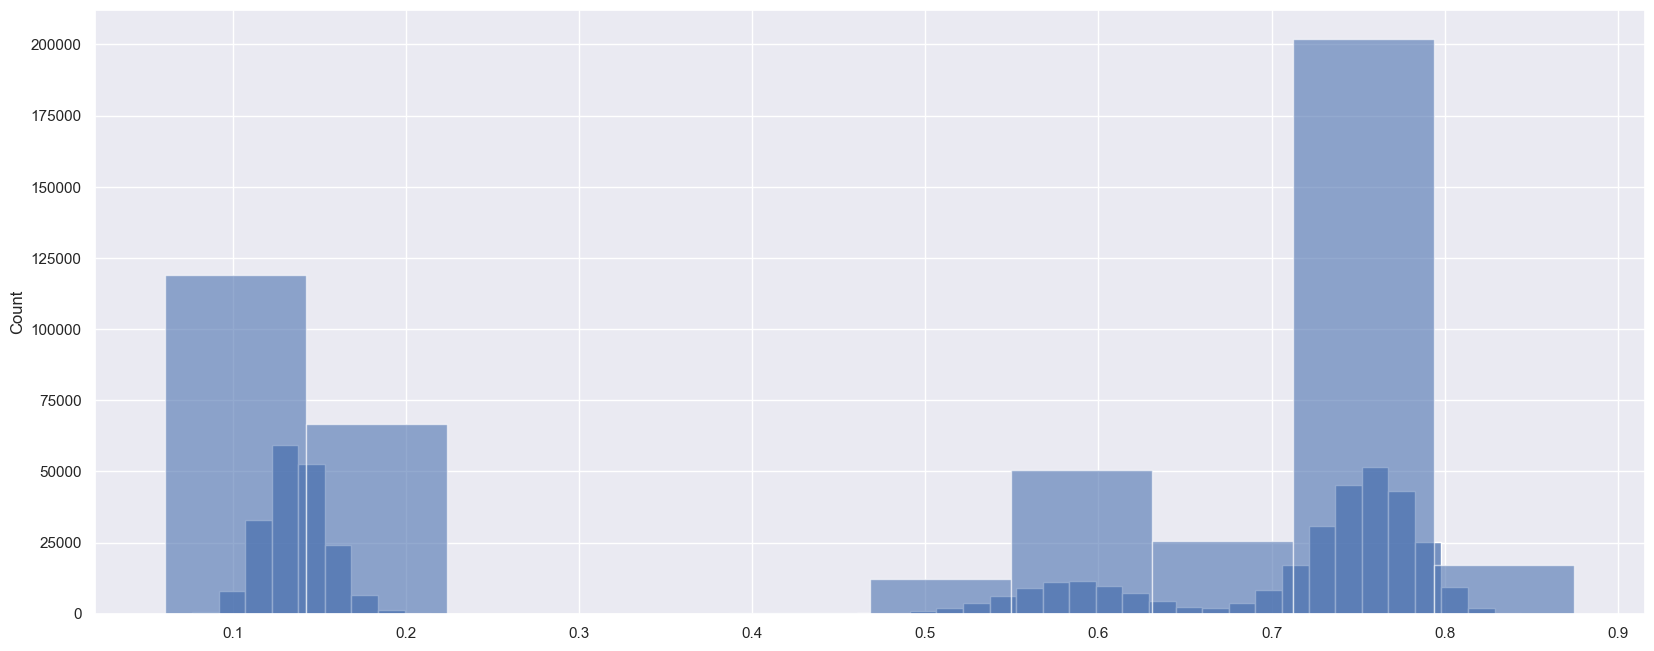

In [13]:
print(history)

maior =0.0
for ii in range(len(history)):
    if history[ii][1]>maior:
        maior = history[ii][1]
        max_index = ii

print(history[max_index][1])
sub = final_predictions[:][max_index]

sns.histplot(data = sub)
mysub = pd.DataFrame(test.index)
mysub['claim'] = sub
mysub['claim'] = mysub['claim'].fillna(0)
# mysub.loc[mysub['claim']>= 0.5].loc[mysub['claim']<=0.7].loc[:,'claim'] = 1.0
print(mysub.mean()*100)
mysub['claim'].hist(alpha = 0.6)
var = 'cleanCatboost_fDS_countna_quantileTransform_QDA02_sum11Best'
mysub.to_csv(var+'_submisssion.csv',index=False)